# Case study to predict Travel Purchase 

## Context

Visit With Us is a travel company which provides multiple travel packages which includes the five packages - Basic, Standard, Deluxe, Super Deluxe, King. In the previous year 18% of the customers purchased the package. Now the company wants to build a new package called Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveller to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. <br>
<br>
The aim of this case study is to analyse the existing data and build a model to predict potential customers who would buy this package.

## Data Description

__CustomerID__: Unique customer ID<br>
__ProdTaken__: Whether the customer has purchased a package or not (0: No, 1: Yes)<br>
__Age__: Age of customer<br>
__TypeofContact__: How customer was contacted (Company Invited or Self Inquiry)<br>
__CityTier__: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in<br>
__DurationOfPitch:__ Duration of the pitch by a salesperson to the customer<br>
__Occupation__: Occupation of customer<br>
__Gender__: Gender of customer<br>
__NumberOfPersonVisiting__: Total number of persons planning to take the trip with the customer<br>
__NumberOfFollowups:__ Total number of follow-ups has been done by sales person after sales pitch<br>
__ProductPitched:__ Product pitched by the salesperson<br>
__PreferredPropertyStar__: Preferred hotel property rating by customer<br>
__MaritalStatus__: Marital status of customer<br>
__NumberOfTrips__: Average number of trips in a year by customer<br>
__Passport__: The customer has a passport or not (0: No, 1: Yes)<br>
__PitchSatisfactionScore:__ Sales pitch satisfaction score<br>
__OwnCar__: Whether the customers own a car or not (0: No, 1: Yes)<br>
__NumberOfChildrenVisiting__: Total number of children with age less than 5 planning to take the trip with the customer<br>
__Designation__: Designation of the customer in the current organisation<br>
__MonthlyIncome__: Gross monthly income of the customer<br>

## Import importatnt libraries

In [174]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingRegressor,BaggingClassifier, RandomForestClassifier, StackingClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier

## Loading and exploring dataset

In [203]:
# The excel file contains 2 sheets, data dict and actual data. Use sheet_name parameter to read the data
data = pd.read_excel('Tourism.xlsx',sheet_name = ['Tourism']) # The excel sheet contains 2 sheets, data dict and actuual data
df=data['Tourism'].copy() # copy data to another dataframe

print("The dataset has {} rows and {} columns".format(df.shape[0],df.shape[1])) # prints the number of rows and columns of dataset

The dataset has 4888 rows and 20 columns


In [204]:
# using random to display random rows rather than only first 5 and last 5
np.random.seed(1)
df.sample(n=10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3015,203015,0,27.0,Company Invited,1,7.0,Salaried,Female,4,6.0,Basic,3.0,Married,5.0,0,4,1,3.0,Executive,23042.0
1242,201242,0,40.0,Self Enquiry,3,13.0,Small Business,Male,2,3.0,King,4.0,Single,2.0,0,4,1,NaN,VP,34833.0
3073,203073,0,29.0,Self Enquiry,2,15.0,Small Business,Male,4,5.0,Basic,3.0,Married,3.0,0,2,0,2.0,Executive,23614.0
804,200804,0,48.0,Company Invited,1,6.0,Small Business,Male,2,1.0,Super Deluxe,3.0,Single,3.0,0,2,0,0.0,AVP,31885.0
3339,203339,0,32.0,Self Enquiry,1,18.0,Small Business,Male,4,4.0,Deluxe,5.0,Divorced,3.0,1,2,0,3.0,Manager,25511.0
3080,203080,1,36.0,Company Invited,1,32.0,Salaried,Female,4,4.0,Basic,4.0,Married,3.0,1,3,0,1.0,Executive,20700.0
2851,202851,0,46.0,Self Enquiry,1,17.0,Salaried,Male,4,4.0,Basic,3.0,Divorced,5.0,0,5,1,1.0,Executive,21332.0
2883,202883,1,32.0,Company Invited,1,27.0,Salaried,Male,4,4.0,Standard,3.0,Divorced,5.0,0,3,1,1.0,Senior Manager,28502.0
1676,201676,0,22.0,Self Enquiry,1,11.0,Salaried,Male,2,1.0,Basic,4.0,Married,2.0,1,4,1,0.0,Executive,17328.0
1140,201140,0,44.0,Self Enquiry,1,13.0,Small Business,Female,2,3.0,King,3.0,Married,1.0,1,4,1,1.0,VP,34049.0


In [205]:
df.info() # Function to display the shape, missing values and datatypes of columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

From the above information we can see that some of the features have null values.

In [206]:
df.duplicated().sum() # function to check duplicate rows

0

There are no duplicates in the dataset.

Since CustomerID has unique values, which will not be particularly used in the analysis, let us drop the column.

In [207]:
df = df.drop(['CustomerID'], axis = 1)
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [208]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0


__Observations:__

 - The customers are in the age group 18 to 61.<br>
 - Most of the customers are in the city tier 1 that us upto 50%.<br>
 - In duration of pitch, upto 75% of the salesperson took around 20 hrs. The max value is 127 which does not seem realistic. This might be an outlier.<br>
 - Max number of visitors is 5.<br>
 - PreferredPropertyStar ranges from 3 to 5.<br>
 - Number of trips max is 22 which can either be an outlier or not. Further analysis has to be done here.<br>
 - Monthly Income ranges from 1000 to 98678. SInce currency type is not given, let us consider it to be INR. The type of currency will not affect our model.<br>

In [209]:
df.isnull().sum() # function to check for null values

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

We can see that some of the columns have null values. Let us handle the null values later.

In [210]:
t_data = df.copy() # Let us keep a backup of the data

## Univariate Analysis

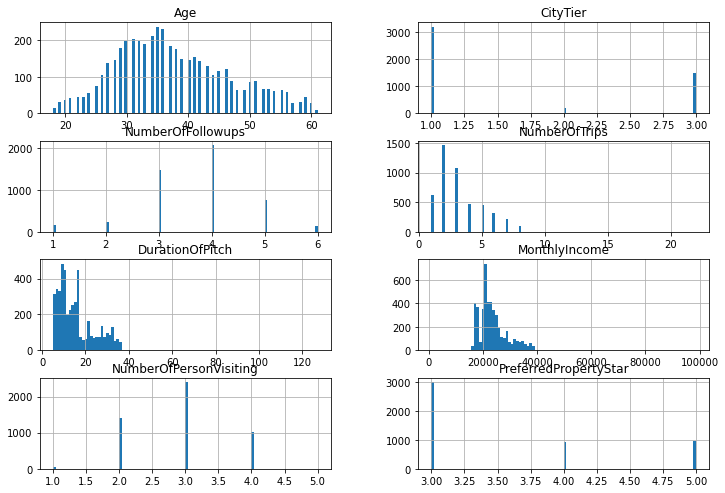

In [211]:
columns = ['Age','CityTier','NumberOfFollowups','NumberOfTrips','DurationOfPitch','MonthlyIncome',
           'NumberOfPersonVisiting','PreferredPropertyStar'] 
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

__Observations:__

 - Age : The age is distributed from 18 to 62 with an average of 36.<br>
 - The customers are mostly from tier 1 and 3. It is very less from tier 2.<br>
 - NumberOfFollowUps: On an average the salesperson took 3 to 5 follow ups to convince the customer to buy a package.<br>
 - NumberofTrips is right skewed.<br>
 - The duration of pitch is mostly between 5 to 38, but it is right skewed.<br>
 - MonthlyIncome is right skewed.<br>
 - Number of people visiting is mostly between 2 to 4.<br>
 - Preferred property star is between 3 to 5, with 3 being maximum.

In [ ]:
#### Observations on ProductPitched

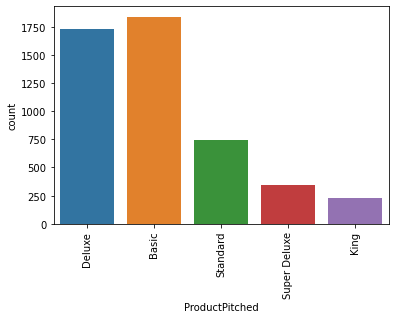

In [212]:
sns.countplot(data=df,x='ProductPitched')
plt.xticks(rotation=90)
plt.show()

 - Basic package is majorly used and king package is least used.

#### Observations on TypeofContact

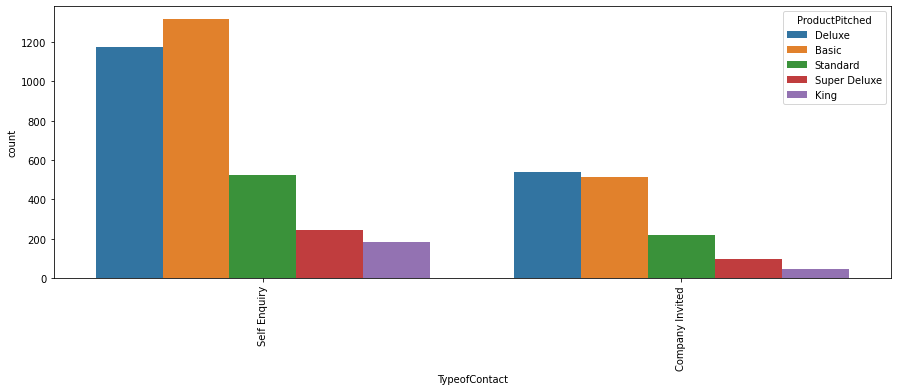

In [213]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='TypeofContact', hue='ProductPitched')
plt.xticks(rotation=90)
plt.show()

__Observations:__

We can see that most of the customers self enquired, while major customers looked into basic and standard packages.

#### Observations on Occupation

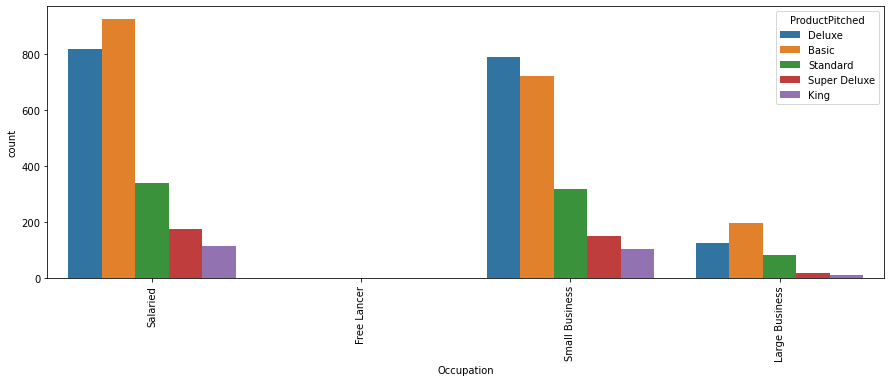

In [214]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='Occupation', hue='ProductPitched')
plt.xticks(rotation=90)
plt.show()

__Observations:__

 - Freelancers have not used any of the packages.<br>
 - The packages were mostly pitched to customers who are salaried or have a small business.<br>
 - The basic and deluxe seem to be popular after which it is standard. The king package is least used.<br>

#### Observations on Gender

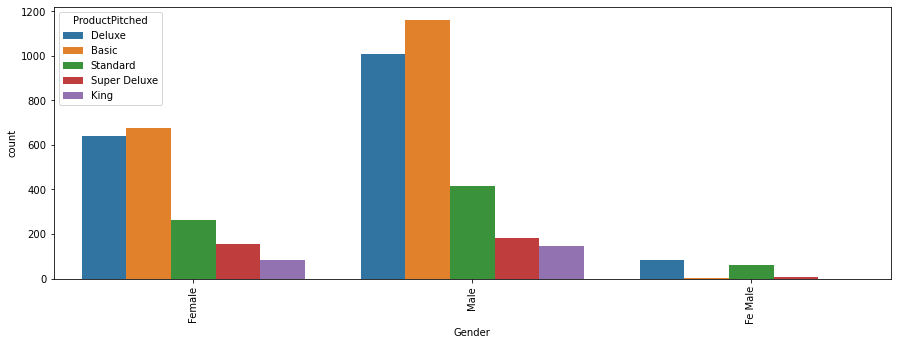

In [215]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='Gender', hue='ProductPitched')
plt.xticks(rotation=90)
plt.show()

We can see that there are  genders. Let us consider Fe Male and a typing error and convert it to female.

In [216]:
df['Gender'] = df['Gender'].replace(['Fe Male'],['Female'])

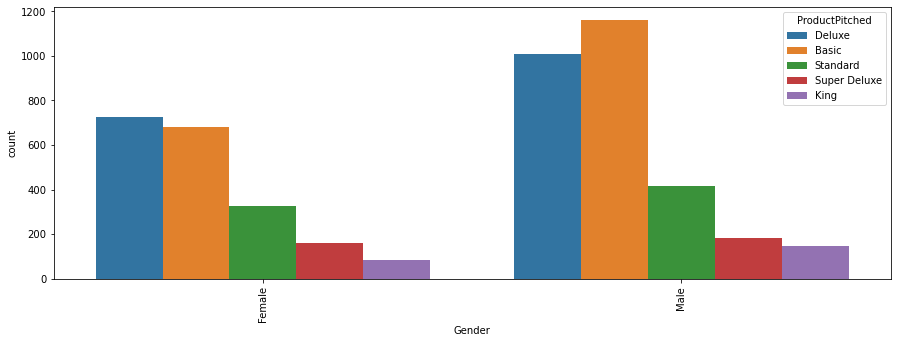

In [217]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='Gender', hue='ProductPitched')
plt.xticks(rotation=90)
plt.show()

__Observations:__

 - The male customers are in majority here.<br>
 - The basic and deluxe seem to be popular after which it is standard. The king package is least used.<br>

#### Observations on MaritalStatus

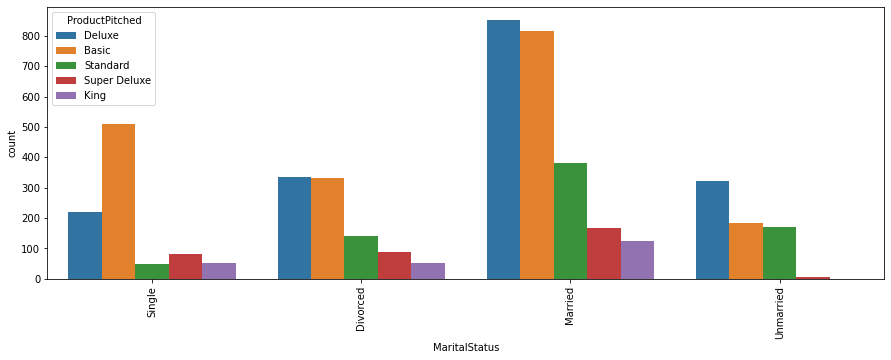

In [218]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='MaritalStatus', hue='ProductPitched')
plt.xticks(rotation=90)
plt.show()

__Observations:__

 - The packages are mostly pitched to married customers.<br>
 - The patterns are varying for customers with different marital status.<br>
 - Divorced customers most likely use the deluxe package.<br>
 - Married customers mostly go for basic and deluxe.<br>
 - Single customers use basic a majority of the time.<br>
 - Unmarried customers mostly fgp for deluxe, and have not used king package.<br>

#### Observations on Designation

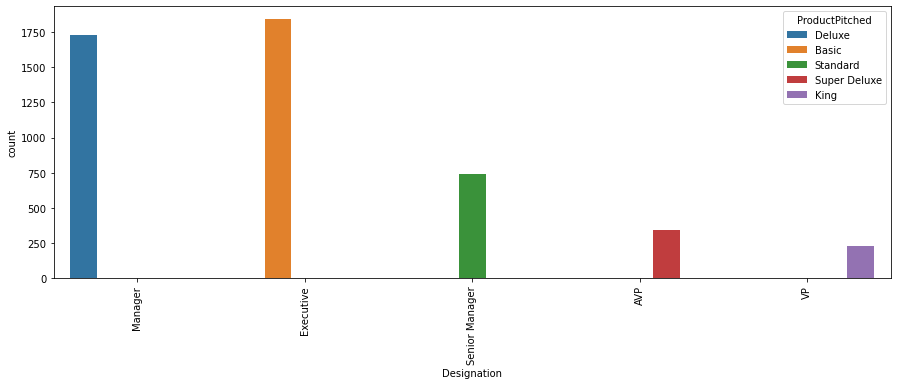

In [219]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='Designation', hue='ProductPitched')
plt.xticks(rotation=90)
plt.show()

__Observations:__

 - The packages seems to be highly related to the designation.<br>
 - AVPs are pitched with super deluxe.<br>
 - Executives with Basic.<br>
 - Managers with Deluxe.<br>
 - Senior Managers with Super deluxe.<br>
 - VPs with King.<br>
 - This pattern might be related to salary which we can find out on further analysis.

## Bivariate Analysis

In [220]:
df.corr()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
ProdTaken,1.000000,-0.147254,0.086852,0.078257,0.009627,0.112171,0.099577,0.018898,0.260844,0.051394,-0.011508,0.007421,-0.130585
Age,-0.147254,1.000000,-0.015625,-0.012063,0.011621,-0.002577,-0.010474,0.184905,0.033399,0.018510,0.048654,0.007370,0.464869
CityTier,0.086852,-0.015625,1.000000,0.022703,-0.001671,0.023652,-0.009164,-0.029709,0.001793,-0.042160,0.003817,0.000672,0.051817
DurationOfPitch,0.078257,-0.012063,0.022703,1.000000,0.065141,0.009434,-0.006637,0.009715,0.033034,-0.002880,-0.001626,0.031408,-0.006252
NumberOfPersonVisiting,0.009627,0.011621,-0.001671,0.065141,1.000000,0.328569,0.033867,0.195223,0.011177,-0.019581,0.010362,0.610621,0.195134
NumberOfFollowups,0.112171,-0.002577,0.023652,0.009434,0.328569,1.000000,-0.024176,0.139517,0.004970,0.004054,0.012112,0.286425,0.176503
PreferredPropertyStar,0.099577,-0.010474,-0.009164,-0.006637,0.033867,-0.024176,1.000000,0.012115,0.001040,-0.022701,0.015742,0.035798,0.014289
NumberOfTrips,0.018898,0.184905,-0.029709,0.009715,0.195223,0.139517,0.012115,1.000000,0.012949,-0.004378,-0.011825,0.168795,0.139105
Passport,0.260844,0.033399,0.001793,0.033034,0.011177,0.004970,0.001040,0.012949,1.000000,0.002926,-0.022330,0.020264,0.002545
PitchSatisfactionScore,0.051394,0.018510,-0.042160,-0.002880,-0.019581,0.004054,-0.022701,-0.004378,0.002926,1.000000,0.068850,0.000878,0.030421


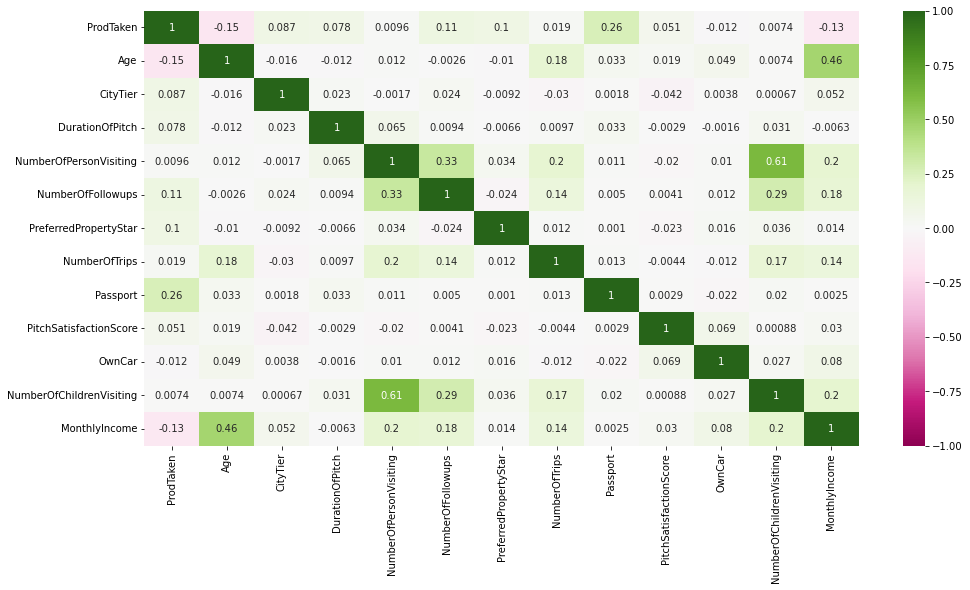

In [221]:
plt.figure(figsize = (16,8))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap="PiYG");

__Observations:__

 - The slots having green and positivel correlated and the ones having pink are negetively correlated.
 - Age and product taken are negatively correlated.<br>
 - There is a positive correlation between age and monthly income. but monthly income and product taken is also negatively correlated.<br>
 - There is a positive correlation between customers having passport and product taken.<br>
 - Number of follow ups and property star have a slight positive correlation, which indicates there is a small influence of number of follow ups on the product taken and number of persons visiting.<br>
 - Age and number of trips have a positive correlation.<br>
 - Monthly income also has an influence on the number of trips.<br>

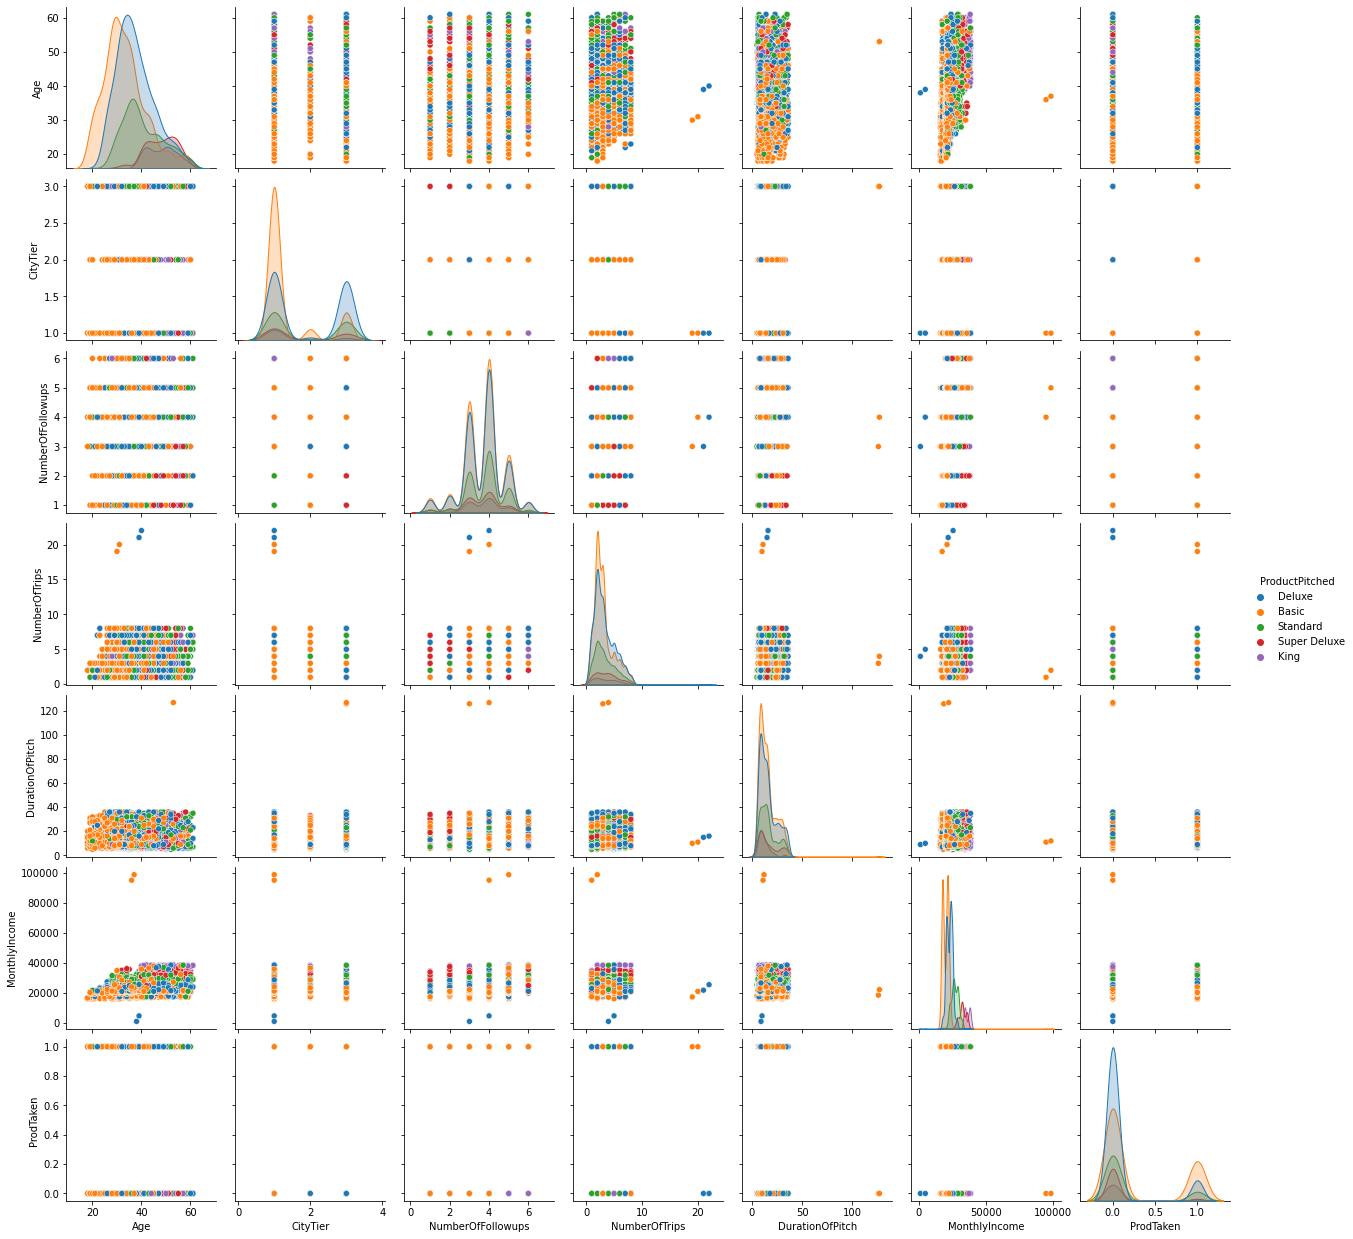

In [222]:
sns.pairplot(df,vars=['Age','CityTier','NumberOfFollowups','NumberOfTrips','DurationOfPitch','MonthlyIncome','ProdTaken'] ,
             diag_kind='kde',hue='ProductPitched');

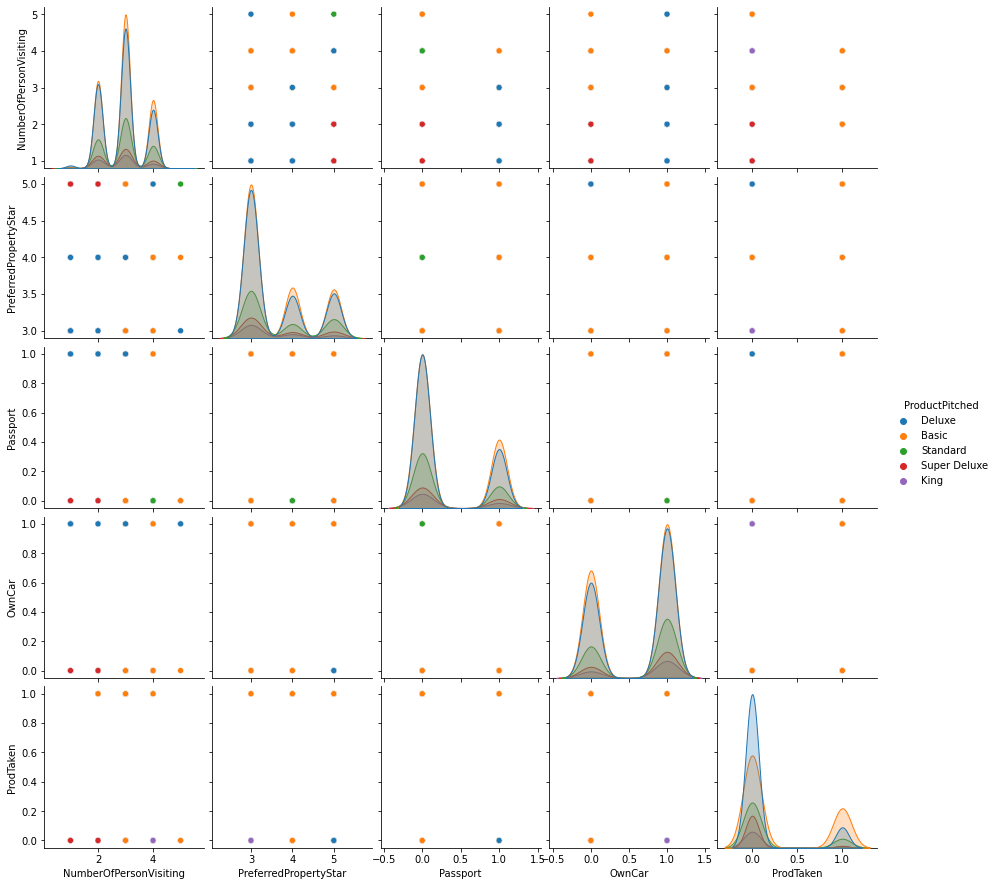

In [223]:
sns.pairplot(df,vars=['NumberOfPersonVisiting','PreferredPropertyStar','Passport','OwnCar','ProdTaken'] ,
             diag_kind='kde',hue='ProductPitched');

__Observations:__

 - Age does not seem to have much influence on product taken, it is distributed.<br>
 - There is not much relation between the attributes, very low correlation. Hence seems like we cannot deduce a correlation.

### Overall observations for different Packages:

#### Basic Package

 - This is a majorly pitched package to most of the customers.<br>
 - The customers who are mostly executives in the profession use this package.<br>
 - The customers whose marital status is single use this package.<br>
 - This package is expected to be low cost compared to other packages. <br>

#### Deluxe package

 - This package is the second most used package.<br>
 - The customers who are mostly managers in the profession use this package.<br>
 - The customers invited by the company take this package compared to the basic package.<br>

#### Standard package

 - Standard package is mostly used by senior managers.<br>
 - This comes with moderate cost, neither low cost nor high cost but somewhere in between.<br>
 - This package is the third most used package.<br>

#### Super Deluxe Package

 - This package is mostly used by AVPs.<br>
 - Customers who are unmarried are less likely to use this package.<br>
 - Gender and type of contact does not seem to have much of an influence on opting this package, but monthly salary does have a role.<br>

#### King Package

 - This package is mostly used by the customers in the VP position.<br>
 - The King package seems to be of high cost compared to other packages.<br>
 - Unmarried customers have not used this package.<br>

## Missing Value Treatement

In [224]:
df.isnull().sum() 

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

We can see that some of the columns have missing values, Let us treat them one by one.

#### Missing Value treatement for Age column

In [225]:
# extracting all the information of other variables where Distance is null
df.loc[df['Age'].isnull()==True]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
11,0,NaN,Self Enquiry,1,21.0,Salaried,Female,2,4.0,Deluxe,3.0,Single,1.0,1,3,0,0.0,Manager,NaN
19,0,NaN,Self Enquiry,1,8.0,Salaried,Male,2,3.0,Basic,3.0,Single,6.0,1,4,0,1.0,Executive,NaN
20,0,NaN,Company Invited,1,17.0,Salaried,Female,3,2.0,Deluxe,3.0,Married,1.0,0,3,1,2.0,Manager,NaN
21,1,NaN,Self Enquiry,3,15.0,Salaried,Male,2,4.0,Deluxe,5.0,Single,1.0,0,2,0,0.0,Manager,18407.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2410,1,NaN,Self Enquiry,1,30.0,Small Business,Male,2,3.0,Basic,4.0,Married,2.0,1,1,0,0.0,Executive,NaN
2413,1,NaN,Self Enquiry,3,21.0,Small Business,Male,2,5.0,Deluxe,3.0,Married,7.0,1,1,0,1.0,Manager,18423.0
2427,1,NaN,Self Enquiry,3,22.0,Small Business,Male,3,3.0,Standard,3.0,Married,3.0,0,5,0,1.0,Senior Manager,18544.0
2430,1,NaN,Self Enquiry,1,14.0,Small Business,Female,3,3.0,Basic,5.0,Married,2.0,1,3,0,2.0,Executive,NaN


Since age have a correlation with designation, let us replace the values with median based on designation

In [226]:
df['Age'] = df['Age'].fillna(df.groupby('Designation')['Age'].transform('mean'))

In [227]:
df['Age'].isnull().sum() 

0

#### Missing value treatment of typeOfContact column

Let us replace the missing values with unknown

In [228]:
df.TypeofContact = df.TypeofContact.fillna('Unknown')

In [229]:
df.TypeofContact.unique()

array(['Self Enquiry', 'Company Invited', 'Unknown'], dtype=object)

#### Missing value treatment of DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips  

Let us replace the missing values in DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips columns with mean

In [230]:
df['DurationOfPitch'].fillna(df['DurationOfPitch'].mean(), inplace = True)
df['DurationOfPitch'].isnull().sum() 

0

In [231]:
df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mean(), inplace = True)
df['NumberOfFollowups'].isnull().sum() 

0

In [232]:
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mean(), inplace = True)
df['PreferredPropertyStar'].isnull().sum() 

0

In [233]:
df['NumberOfTrips'].fillna(df['NumberOfTrips'].mean(), inplace = True)
df['NumberOfTrips'].isnull().sum() 

0

#### Missing Value treatement of NumberOfChildrenVisiting

Considering number of children visitng to be 0 if it is unknown, let us replace the values with 0

In [234]:
df.NumberOfChildrenVisiting = df.NumberOfChildrenVisiting.fillna(0)
df.NumberOfChildrenVisiting.unique()

array([0., 2., 1., 3.])

#### Missing Value Treatement of MonthlySalary

Let us replace the missing monthly salary with mean based on designation

In [235]:
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df.groupby('Designation')['MonthlyIncome'].transform('mean'))
df['MonthlyIncome'].isnull().sum() 

0

In [236]:
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

Let us typecast these updated columns to int except for typeOfContact

In [237]:
df['Age'] = df['Age'].astype(int)
df['DurationOfPitch'] = df['DurationOfPitch'].astype(int)
df['NumberOfFollowups'] = df['NumberOfFollowups'].astype(int)
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].astype(int)
df['NumberOfTrips'] = df['NumberOfTrips'].astype(int)
df['NumberOfChildrenVisiting'] = df['NumberOfChildrenVisiting'].astype(int)
df['MonthlyIncome'] = df['MonthlyIncome'].astype(int)

In [238]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41,Self Enquiry,3,6,Salaried,Female,3,3,Deluxe,3,Single,1,1,2,1,0,Manager,20993
1,0,49,Company Invited,1,14,Salaried,Male,3,4,Deluxe,4,Divorced,2,0,3,1,2,Manager,20130
2,1,37,Self Enquiry,1,8,Free Lancer,Male,3,4,Basic,3,Single,7,1,3,0,0,Executive,17090
3,0,33,Company Invited,1,9,Salaried,Female,2,3,Basic,3,Divorced,2,1,5,1,1,Executive,17909
4,0,33,Self Enquiry,1,8,Small Business,Male,2,3,Basic,4,Divorced,1,0,5,1,0,Executive,18468


We have treated all the columns containing missing values

## Outlier Detection and treatement

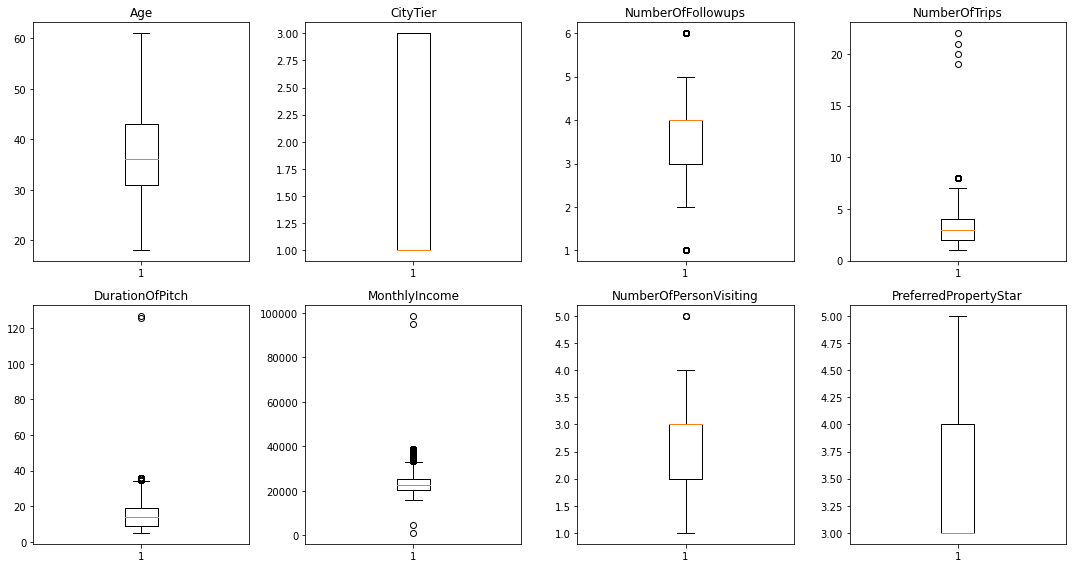

In [239]:
columns = ['Age','CityTier','NumberOfFollowups','NumberOfTrips','DurationOfPitch',
           'MonthlyIncome','NumberOfPersonVisiting','PreferredPropertyStar']  # list of numerical values in the dataset
plt.figure(figsize=(15,8)) # specify the size of each plot

for i, variable in enumerate(columns):
    plt.subplot(2,4, i + 1) # specify where to place each plot
    plt.boxplot(df[variable], whis=1.5) # create boxplot
    plt.tight_layout() # used to adjust the subplots
    plt.title(variable) # set the title to be the column name of that particular plot

plt.show()

#### Calculate the outliers in each column

In [240]:
Q1 = df[columns].quantile(0.25) # first quantile -> 25% percentile
Q3 = df[columns].quantile(0.75) # second quantile -> 75% percentile

IQR = Q3 - Q1 # Inter quantile range                  

lower_whisker = Q1 - 1.5*IQR # finding the lower bound   
upper_whisker = Q3 + 1.5*IQR # finding the upper bound

# find the percentage of outliers in each column
((df[columns] < lower_whisker) | (df[columns] > upper_whisker)).sum()/df.shape[0]*100 

Age                       0.000000
CityTier                  0.000000
NumberOfFollowups         6.382979
NumberOfTrips             2.229951
DurationOfPitch           2.291326
MonthlyIncome             7.303601
NumberOfPersonVisiting    0.061375
PreferredPropertyStar     0.000000
dtype: float64

__Observations:__

 - Age, CityTier and PreferredPropertyRate do not have outliers.<br>
 - NumberOfFollowUps ranges from 1 to 6 which is normal.<br>
 - NumberOfTrips seems to be high, but there are chances some customers might be travel enthusiasts or bloggers who might travel due to work, Hence let us keep it as it is.<br>
 - DurationOfPitch Seems to be very high. Let us treat this column.<br>
 - MonthlyIncome has outliers, but let us consider some have high monthly salaries and leave it as it is.<br>
 - Since there is no limit given in the number of persons who can visit, let us keep it as it is.<br>

#### Let us treat outliers in DurationOfPitch column

In [241]:
Q1 = df['DurationOfPitch'].quantile(0.25)  # first quantile -> 25% percentile of column miles
Q3 = df['DurationOfPitch'].quantile(0.75)  # second quantile -> 75% percentile of column miles
IQR = Q3 - Q1 # Inter quantile range       
lower_whisker = Q1 - 1.5 * IQR # finding the lower bound   
upper_whisker = Q3 + 1.5 * IQR  # finding the upper bound

# replacing the outliers with lower bound if it is less than lower bound or with upper bound if it is greater than upper bound
df['DurationOfPitch'] = np.clip(df['DurationOfPitch'], lower_whisker, upper_whisker) 

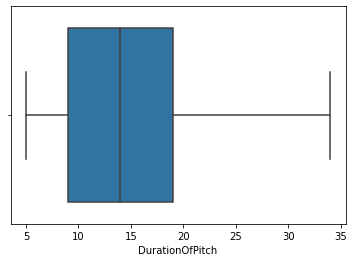

In [242]:
sns.boxplot(data=df, x='DurationOfPitch');

The Outliers are removed.

## Feature Engineering

### Log Transformation

MonthlyIncome and NumberOftrips columns are quite skewed. Let us apply log transformation and see if it reduces the skewness.

#### Log Transformation of monthly Income column

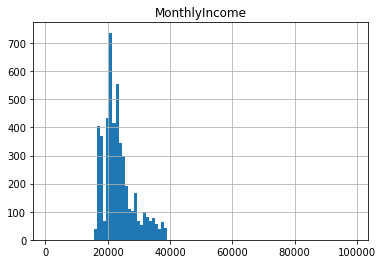

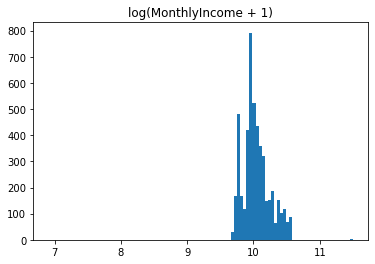

In [243]:
df['MonthlyIncome'].hist(bins=100); 
plt.title('MonthlyIncome')
plt.show()
plt.hist(np.log(df['MonthlyIncome'] + 1), 100)
plt.title('log(MonthlyIncome + 1)')
plt.show()

Log transformation does not add much difference to the skewness so let us try sine transformation and square root transformation.

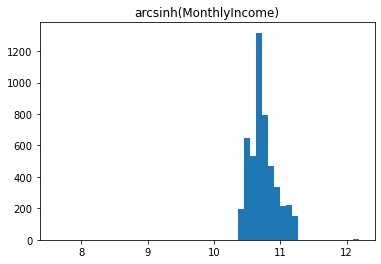

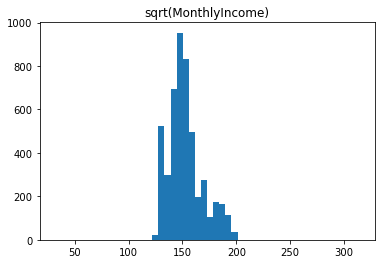

In [244]:
plt.hist(np.arcsinh(df['MonthlyIncome']), 50)
plt.title('arcsinh(MonthlyIncome)')
plt.show()
plt.hist(np.sqrt(df['MonthlyIncome']), 50)
plt.title('sqrt(MonthlyIncome)')
plt.show()

These transformations alos seem to be same. So let us not transform the data.

#### Log transformation of number of trips

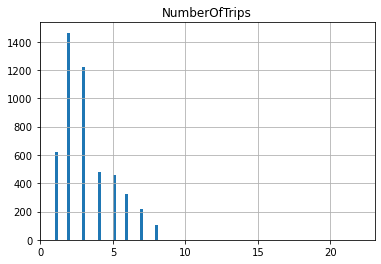

<function matplotlib.pyplot.show(close=None, block=None)>

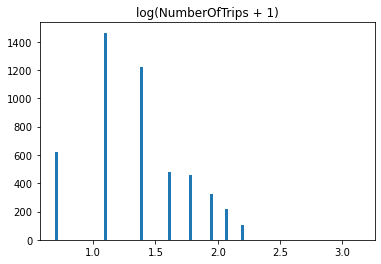

In [245]:
df['NumberOfTrips'].hist(bins=100); 
plt.title('NumberOfTrips')
plt.show()
plt.hist(np.log(df['NumberOfTrips'] + 1), 100)
plt.title('log(NumberOfTrips + 1)')
plt.show

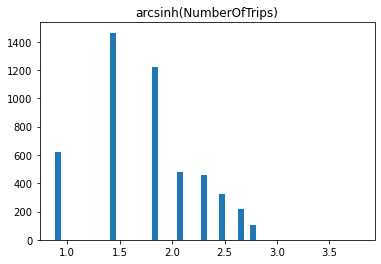

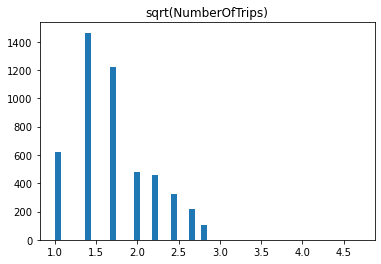

In [246]:
plt.hist(np.arcsinh(df['NumberOfTrips']), 50)
plt.title('arcsinh(NumberOfTrips)')
plt.show()
plt.hist(np.sqrt(df['NumberOfTrips']), 50)
plt.title('sqrt(NumberOfTrips)')
plt.show()

All these transformations do not make a difference. So let us keep the data on the number of trips as it is.

### One Hot Encoding

Let us convert columns having object datatype to categorical datatype.

In [247]:
cols = df.select_dtypes(['object'])
cols.columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [248]:
for i in cols.columns:
    df[i] = df[i].astype('category')

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4888 non-null   int32   
 2   TypeofContact             4888 non-null   category
 3   CityTier                  4888 non-null   int64   
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4888 non-null   int32   
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4888 non-null   int32   
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4888 non-null   int32   
 13  Passport                  4888 non-null   int64 

Look at the unique values in columns havint categorical datatype.

In [254]:
for i in cols.columns:
    print('Unique values in',i, 'are :')
    print(cols[i].value_counts()) # print the number of unique values in a column
    print()
    print('*'*50+'\n')

Unique values in TypeofContact are :
Self Enquiry       3444
Company Invited    1419
Unknown              25
Name: TypeofContact, dtype: int64

**************************************************

Unique values in Occupation are :
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

**************************************************

Unique values in Gender are :
Male      2916
Female    1972
Name: Gender, dtype: int64

**************************************************

Unique values in ProductPitched are :
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

**************************************************

Unique values in MaritalStatus are :
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

**************************************************

Unique values in Designatio

In [255]:
df = pd.get_dummies(df, columns=['TypeofContact', 'Occupation', 'Gender', 'ProductPitched','MaritalStatus', 'Designation'], 
                    drop_first=True)

df.head()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,41,3,6.0,3,3,3,1,1,2,...,0,0,0,0,1,0,0,1,0,0
1,0,49,1,14.0,3,4,4,2,0,3,...,0,0,0,0,0,0,0,1,0,0
2,1,37,1,8.0,3,4,3,7,1,3,...,0,0,0,0,1,0,1,0,0,0
3,0,33,1,9.0,2,3,3,2,1,5,...,0,0,0,0,0,0,1,0,0,0
4,0,33,1,8.0,2,3,4,1,0,5,...,0,0,0,0,0,0,1,0,0,0


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ProdTaken                    4888 non-null   int64  
 1   Age                          4888 non-null   int32  
 2   CityTier                     4888 non-null   int64  
 3   DurationOfPitch              4888 non-null   float64
 4   NumberOfPersonVisiting       4888 non-null   int64  
 5   NumberOfFollowups            4888 non-null   int32  
 6   PreferredPropertyStar        4888 non-null   int32  
 7   NumberOfTrips                4888 non-null   int32  
 8   Passport                     4888 non-null   int64  
 9   PitchSatisfactionScore       4888 non-null   int64  
 10  OwnCar                       4888 non-null   int64  
 11  NumberOfChildrenVisiting     4888 non-null   int32  
 12  MonthlyIncome                4888 non-null   int32  
 13  TypeofContact_Self

In [257]:
cleaned_data = df.copy()

In [258]:
cleaned_data.head()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,41,3,6.0,3,3,3,1,1,2,...,0,0,0,0,1,0,0,1,0,0
1,0,49,1,14.0,3,4,4,2,0,3,...,0,0,0,0,0,0,0,1,0,0
2,1,37,1,8.0,3,4,3,7,1,3,...,0,0,0,0,1,0,1,0,0,0
3,0,33,1,9.0,2,3,3,2,1,5,...,0,0,0,0,0,0,1,0,0,0
4,0,33,1,8.0,2,3,4,1,0,5,...,0,0,0,0,0,0,1,0,0,0


## Calculate the ratio of true or false in the outcome variable (ProdTaken)

In [259]:
n_true = len(df.loc[df['ProdTaken'] == 1])
n_false = len(df.loc[df['ProdTaken'] == 0])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 920 (18.82%)
Number of false cases: 3968 (81.18%)


We can see that 18% of the customers have taken up the packages. Let us check for patterns and see how this data will be useful for the new Wellness Tourism Package.

## Split the data and Verify ratio in train and test

In [260]:
X = df.drop(['ProdTaken'],axis=1)     # Predictor feature columns (8 X m)
Y = df['ProdTaken']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,...,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
3878,53,3,34.0,3,4,3,4,0,1,1,...,0,0,0,1,0,0,1,0,0,0
3933,39,1,9.0,3,4,3,7,1,1,0,...,0,0,0,0,0,1,1,0,0,0
3,33,1,9.0,2,3,3,2,1,5,1,...,0,0,0,0,0,0,1,0,0,0
4823,20,3,12.0,4,4,4,2,1,4,1,...,0,1,0,0,0,1,0,0,1,0
4230,50,1,7.0,3,5,3,2,1,3,0,...,0,0,1,0,1,0,0,0,0,0


In [261]:
y_train.head()

3878    0
3933    0
3       0
4823    1
4230    0
Name: ProdTaken, dtype: int64

We have 70% of data in training set and 30% in test set.

In [262]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df.index)) * 100))

69.99% data is in training set
30.01% data is in test set


In [265]:
print("Original Product Taken True Values    : {0} ({1:0.2f}%)".format(len(cleaned_data.loc[cleaned_data['ProdTaken'] == 1]), (len(cleaned_data.loc[cleaned_data['ProdTaken'] == 1])/len(cleaned_data.index)) * 100))
print("Original Product Taken False Values   : {0} ({1:0.2f}%)".format(len(cleaned_data.loc[cleaned_data['ProdTaken'] == 0]), (len(cleaned_data.loc[cleaned_data['ProdTaken'] == 0])/len(cleaned_data.index)) * 100))
print("")
print("Training Product Taken True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Product Taken False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Product Taken True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Product Taken False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Product Taken True Values    : 920 (18.82%)
Original Product Taken False Values   : 3968 (81.18%)

Training Product Taken True Values    : 624 (18.24%)
Training Product Taken False Values   : 2797 (81.76%)

Test Product Taken True Values        : 296 (20.18%)
Test Product Taken False Values       : 1171 (79.82%)



The true/false split is almost the same in the original and training set, but slightly different in the test set.

### Let us built the functions to create confusion matrix and to calculate metrics - accuracy, precision, recall and F1 score

In [271]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(x_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [307]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    
    #Accuracy of the model
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    #Precision of the model
    train_f1 = metrics.f1_score(y_train,pred_train)
    test_f1 = metrics.f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(x_train,y_train))
        print("Accuracy on test set : ",model.score(x_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1 on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1 on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

## Bagging

Let us build a bagging classifier, random forest and decision tree based on default values.

### Bagging Classifier

In [269]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(x_train,y_train)

BaggingClassifier(random_state=1)

In [275]:
bagging_estimator_score=get_metrics_score(bagging_estimator) # calculate the metrics using function defined

Accuracy on training set :  0.9953230049693073
Accuracy on test set :  0.8991138377641446
Recall on training set :  0.9743589743589743
Recall on test set :  0.5844594594594594
Precision on training set :  1.0
Precision on test set :  0.8737373737373737
F1 on training set :  0.9870129870129869
F1 on test set :  0.7004048582995951


 - The metrics are high in the training set, but very less in the testing set. There is a considerable difference.

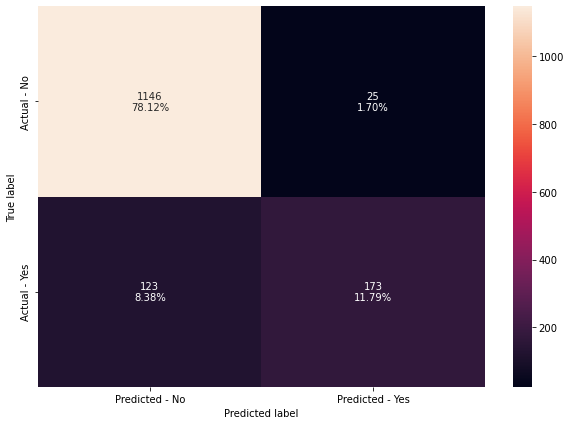

In [276]:
make_confusion_matrix(bagging_estimator,y_test)

The confusion matrix
 - True Positives (TP): We correctly predicted that 173 customers accepted personal loan in the previous campaign<br>
 - True Negatives (TN): We correctly predicted that 1146 customers did not accept the personal loan in the previous campaign<br>
 - False Positives (FP): We incorrectly predicted that 25 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - False Negatives (FN): We incorrectly predicted that 123 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

### Random Forest Classifier

In [277]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [278]:
rf_estimator_score=get_metrics_score(rf_estimator) # calculate the metrics using function defined

Accuracy on training set :  1.0
Accuracy on test set :  0.901840490797546
Recall on training set :  1.0
Recall on test set :  0.5337837837837838
Precision on training set :  1.0
Precision on test set :  0.9634146341463414
F1 on training set :  1.0
F1 on test set :  0.6869565217391304


 - The accuracy and precision of training and test set seems to be near, but the recall and F1 score have considerable difference.

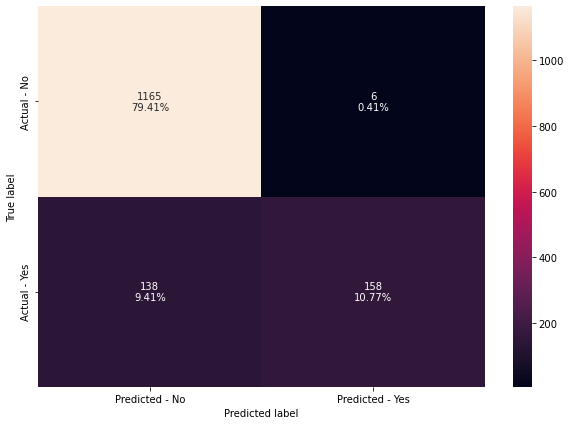

In [279]:
make_confusion_matrix(rf_estimator,y_test)

The confusion matrix
 - True Positives (TP): We correctly predicted that 158 customers accepted personal loan in the previous campaign<br>
 - True Negatives (TN): We correctly predicted that 1165 customers did not accept the personal loan in the previous campaign<br>
 - False Positives (FP): We incorrectly predicted that 6 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - False Negatives (FN): We incorrectly predicted that 138 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

### Decision Tree Classifier

In [280]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [283]:
dTree_estimator_score=get_metrics_score(dTree) # calculate the metrics using function defined

Accuracy on training set :  1.0
Accuracy on test set :  0.8977505112474438
Recall on training set :  1.0
Recall on test set :  0.7668918918918919
Precision on training set :  1.0
Precision on test set :  0.737012987012987
F1 on training set :  1.0
F1 on test set :  0.7516556291390728


 - The metrics are high in the training set, but very less in the testing set. There is a considerable difference.

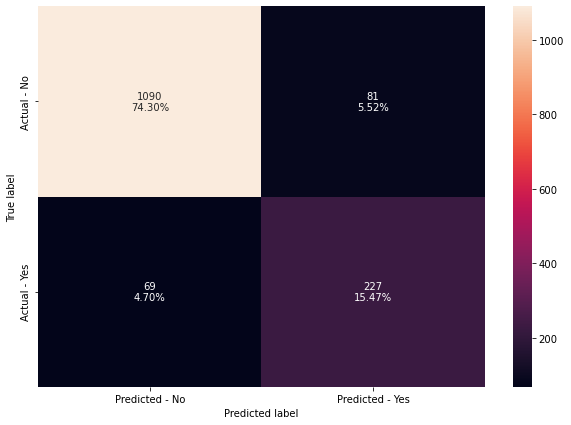

In [282]:
make_confusion_matrix(dTree,y_test)

The confusion matrix
 - True Positives (TP): We correctly predicted that 227 customers accepted personal loan in the previous campaign<br>
 - True Negatives (TN): We correctly predicted that 1090 customers did not accept the personal loan in the previous campaign<br>
 - False Positives (FP): We incorrectly predicted that 81 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - False Negatives (FN): We incorrectly predicted that 69 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

__Observations:__

 - In all the three models the training set is overfitting the data.<br>
 - the precision of random forect classifier is better than the other two models.<br>

## Hyperparameter tuning (Bagging)

### Bagging Classifier

In [287]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.6,0.7,0.8,0.9,1], 
              'max_features': [0.6,0.7,0.8,0.9,1],
              'n_estimators' : [30,40,50,60,70],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(x_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=70,
                  random_state=1)

In [288]:
bagging_estimator_tuned_score=get_metrics_score(bagging_estimator_tuned) # calculate the metrics using function defined

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9175187457396047
Recall on training set :  0.9983974358974359
Recall on test set :  0.6216216216216216
Precision on training set :  1.0
Precision on test set :  0.9533678756476683
F1 on training set :  0.9991980753809142
F1 on test set :  0.7525562372188138


 - There is a significant increase in the metrics score but still there is a big difference in trainig and test recall.

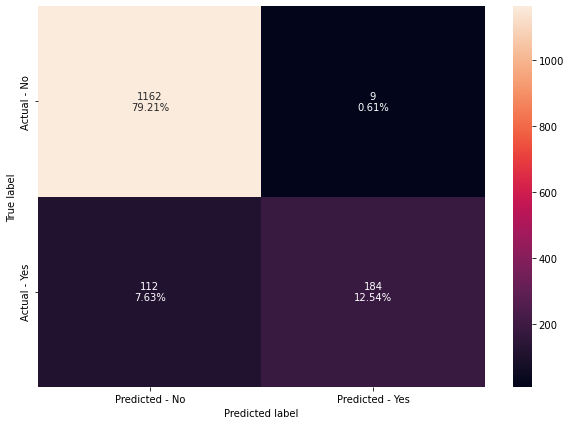

In [290]:
make_confusion_matrix(bagging_estimator_tuned,y_test)

The confusion matrix
 - True Positives (TP): We correctly predicted that 184 customers accepted personal loan in the previous campaign<br>
 - True Negatives (TN): We correctly predicted that 1162 customers did not accept the personal loan in the previous campaign<br>
 - False Positives (FP): We incorrectly predicted that 9 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - False Negatives (FN): We incorrectly predicted that 112 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

### Using LogiticRegression as estimator in bagging classifier

In [292]:
bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear',random_state=1,max_iter=1000),random_state=1)
bagging_lr.fit(x_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                    random_state=1,
                                                    solver='liblinear'),
                  random_state=1)

In [293]:
bagging_lr_tuned_score=get_metrics_score(bagging_lr) # calculate the metrics using function defined

Accuracy on training set :  0.8333820520315697
Accuracy on test set :  0.8159509202453987
Recall on training set :  0.10096153846153846
Recall on test set :  0.10135135135135136
Precision on training set :  0.875
Precision on test set :  0.8823529411764706
F1 on training set :  0.18103448275862072
F1 on test set :  0.18181818181818185


 - Here the recall and F1 score have reduced a lot compared to previous models.
 - The Recall of the model is almost same for train set and test set. It is slightly higher in the test set.

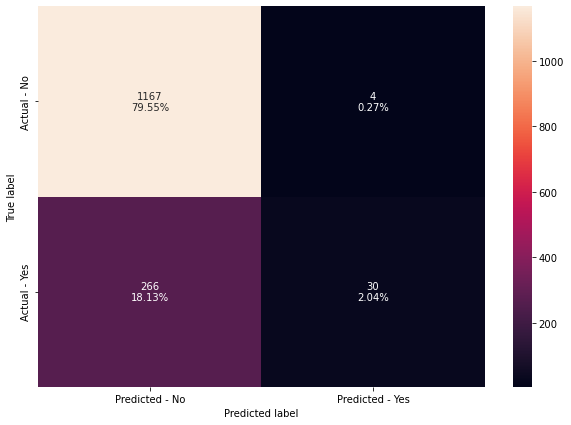

In [304]:
make_confusion_matrix(bagging_lr,y_test)

The confusion matrix
 - True Positives (TP): We correctly predicted that 30 customers accepted personal loan in the previous campaign<br>
 - True Negatives (TN): We correctly predicted that 1167 customers did not accept the personal loan in the previous campaign<br>
 - False Positives (FP): We incorrectly predicted that 4 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - False Negatives (FN): We incorrectly predicted that 266 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

### Random Forest Classifier

In [295]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(max_features=0.6000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=5,
                       n_estimators=200, random_state=1)

In [296]:
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned) # calculate the metrics using function defined

Accuracy on training set :  0.9155217772581117
Accuracy on test set :  0.8534423994546694
Recall on training set :  0.5673076923076923
Recall on test set :  0.34121621621621623
Precision on training set :  0.9490616621983914
Precision on test set :  0.8347107438016529
F1 on training set :  0.7101303911735206
F1 on test set :  0.4844124700239808


 - The scores have improved compared to base model. The recall score still seems to have some difference.

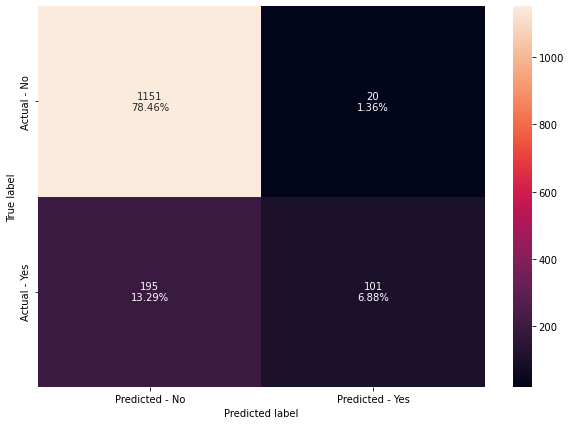

In [297]:
make_confusion_matrix(rf_estimator_tuned,y_test)

The confusion matrix
 - True Positives (TP): We correctly predicted that 101 customers accepted personal loan in the previous campaign<br>
 - True Negatives (TN): We correctly predicted that 1151 customers did not accept the personal loan in the previous campaign<br>
 - False Positives (FP): We incorrectly predicted that 20 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - False Negatives (FN): We incorrectly predicted that 195 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

### Using Class weight in RandomForest

In [298]:
# Choose the type of classifier. 
rf_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "class_weight": [{0: 0.3, 1: 0.7}],
    "n_estimators": [100,150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_weighted.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7},
                       max_features=0.6000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=6,
                       n_estimators=150, random_state=1)

In [299]:
rf_estimator_weighted_score=get_metrics_score(rf_estimator_weighted) # calculate the metrics using function defined

Accuracy on training set :  0.9219526454253142
Accuracy on test set :  0.8623040218132243
Recall on training set :  0.7339743589743589
Recall on test set :  0.49324324324324326
Precision on training set :  0.8193202146690519
Precision on test set :  0.7373737373737373
F1 on training set :  0.7743026204564666
F1 on test set :  0.5910931174089069


 - This model has a better performance compared to tuned random forest.

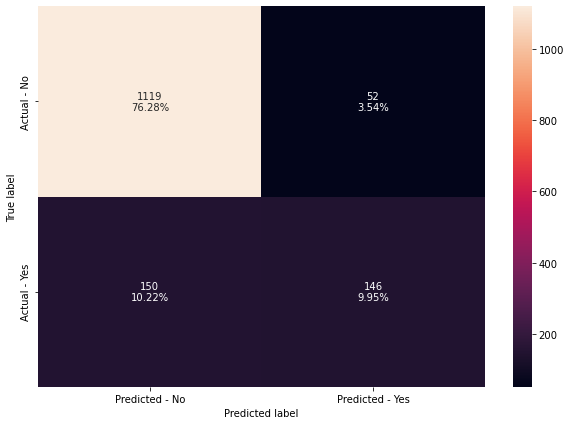

In [306]:
make_confusion_matrix(rf_estimator_weighted,y_test)

The confusion matrix
 - True Positives (TP): We correctly predicted that 146 customers accepted personal loan in the previous campaign<br>
 - True Negatives (TN): We correctly predicted that 1119 customers did not accept the personal loan in the previous campaign<br>
 - False Positives (FP): We incorrectly predicted that 52 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - False Negatives (FN): We incorrectly predicted that 150 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

### Decision tree

In [301]:
# Choose the type of classifier. 
dtree_estimator_tuned = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator_tuned.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3,
                       min_impurity_decrease=0.001, random_state=1)

In [302]:
dtree_estimator_tuned_score=get_metrics_score(dtree_estimator_tuned) # calculate the metrics using function defined

Accuracy on training set :  0.8325051154633148
Accuracy on test set :  0.8152692569870484
Recall on training set :  0.3685897435897436
Recall on test set :  0.3108108108108108
Precision on training set :  0.5623471882640587
Precision on test set :  0.5786163522012578
F1 on training set :  0.44530493707647634
F1 on test set :  0.40439560439560435


 - The Recall seems to be doing good compared to all the other models here.

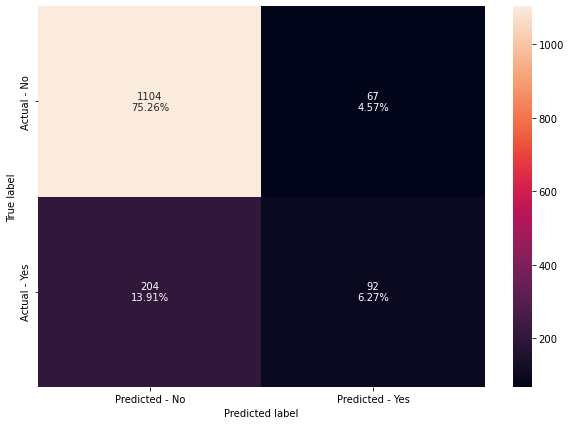

In [305]:
make_confusion_matrix(dtree_estimator_tuned,y_test)

The confusion matrix
 - True Positives (TP): We correctly predicted that 92 customers accepted personal loan in the previous campaign<br>
 - True Negatives (TN): We correctly predicted that 1104 customers did not accept the personal loan in the previous campaign<br>
 - False Positives (FP): We incorrectly predicted that 67 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - False Negatives (FN): We incorrectly predicted that 204 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

### Feature Importance of decision tree

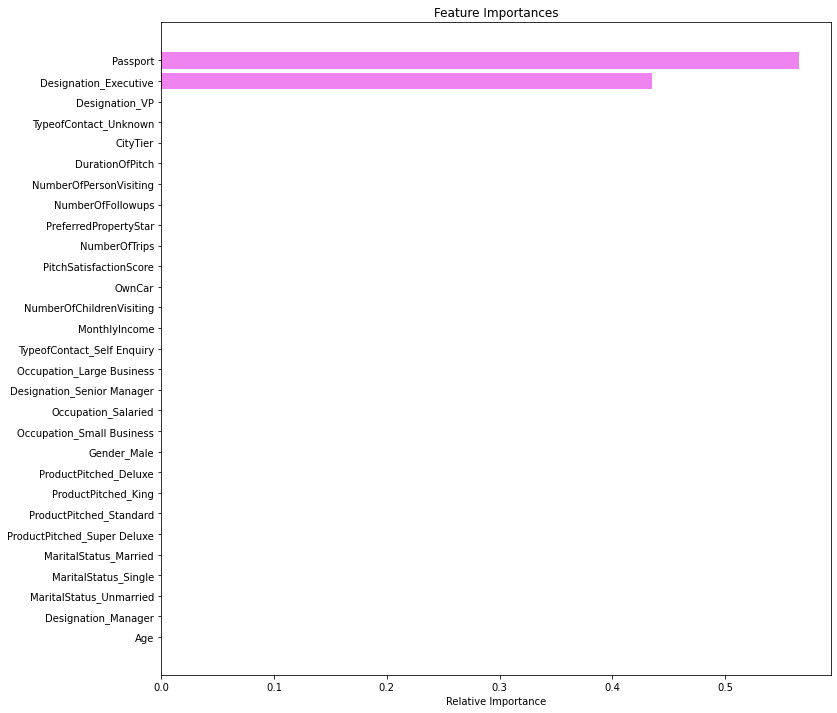

In [340]:
importances = dtree_estimator_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Feature Importance of Random Forest

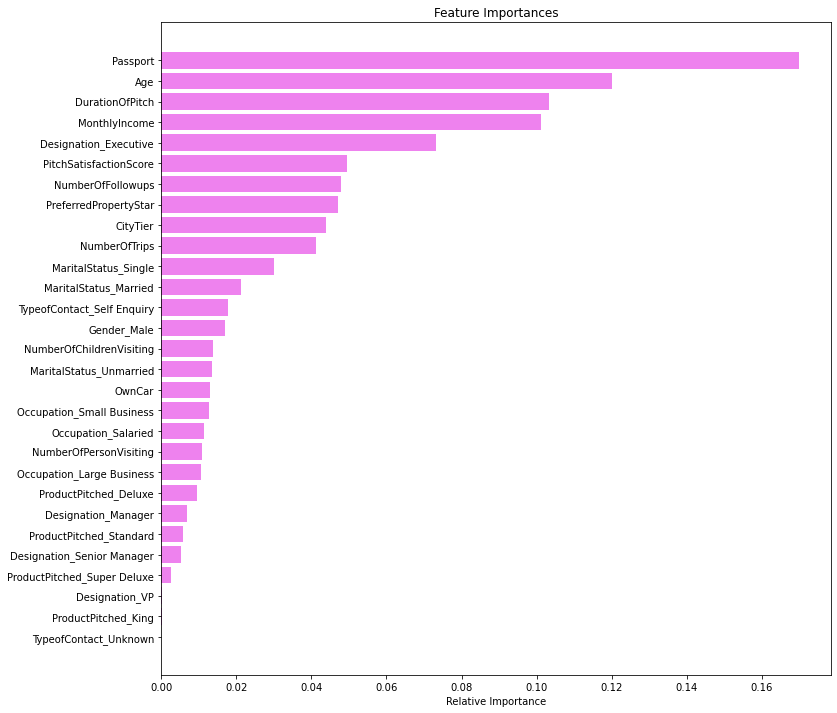

In [341]:
importances = rf_estimator_weighted.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Comparing Models (Bagging)

In [308]:
# defining list of models
models = [bagging_estimator,bagging_estimator_tuned,bagging_lr,rf_estimator,rf_estimator_tuned,
          rf_estimator_weighted,dTree,dtree_estimator_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train=[]
f1_test=[]

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    f1_train.append(np.round(j[6],2))
    f1_test.append(np.round(j[7],2))

In [309]:
comparison_frame = pd.DataFrame({'Model':['Bagging classifier with default parameters','Tuned Bagging Classifier',
                                        'Bagging classifier with base_estimator=LR', 'Random Forest with deafult parameters',
                                         'Tuned Random Forest Classifier','Random Forest with class_weights',
                                          'Decision Tree With default Parameters','Tuned Decision Tree Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1_score':f1_train,'Test_F1_score':f1_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1_score,Test_F1_score
0,Bagging classifier with default parameters,1.00,0.90,0.97,0.58,1.00,0.87,0.99,0.70
1,Tuned Bagging Classifier,1.00,0.92,1.00,0.62,1.00,0.95,1.00,0.75
2,Bagging classifier with base_estimator=LR,0.83,0.82,0.10,0.10,0.88,0.88,0.18,0.18
3,Random Forest with deafult parameters,1.00,0.90,1.00,0.53,1.00,0.96,1.00,0.69
4,Tuned Random Forest Classifier,0.92,0.85,0.57,0.34,0.95,0.83,0.71,0.48
5,Random Forest with class_weights,0.92,0.86,0.73,0.49,0.82,0.74,0.77,0.59
6,Decision Tree With default Parameters,1.00,0.90,1.00,0.77,1.00,0.74,1.00,0.75
7,Tuned Decision Tree Classifier,0.83,0.82,0.37,0.31,0.56,0.58,0.45,0.40


### Observations:

#### Model can predict the outcome in the wrong way:

 - The model predicts that the customer will buy the package, but does not buy the package.<br>
 - The model predicts that the customer will buy a package but does not buy a package.<br>
 
Losing a potential customer will cause mode loss, hence affecting the business. Hence we use __Recall__ as the metric of evaluation. We have to increase the recall to reduce false negatives.<br>

 - The feature importances show that passport and designation have higher influence on the prediction of a potential customer according to decision tree.<br>
 - The feature importances show that passport and age have higher influence on the prediction of a potential customer according to random forest.<br>
 
From the above comparison, we can see that Bagging with base estimator as logistic regression have a recall score same for both train and test data which means it is neither overfitting or underfitting the data. Hence we go with this model.

## Boosting

### AdaBoost Classifier

In [314]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(x_train,y_train)

AdaBoostClassifier(random_state=1)

In [315]:
abc_estimator__score=get_metrics_score(abc) # calculate the metrics using function defined

Accuracy on training set :  0.8497515346389944
Accuracy on test set :  0.8289025221540559
Recall on training set :  0.3301282051282051
Recall on test set :  0.27364864864864863
Precision on training set :  0.6821192052980133
Precision on test set :  0.6923076923076923
F1 on training set :  0.4449244060475162
F1 on test set :  0.39225181598062947


 - In this model, all the scoring metrics are doing well in both train and test data.

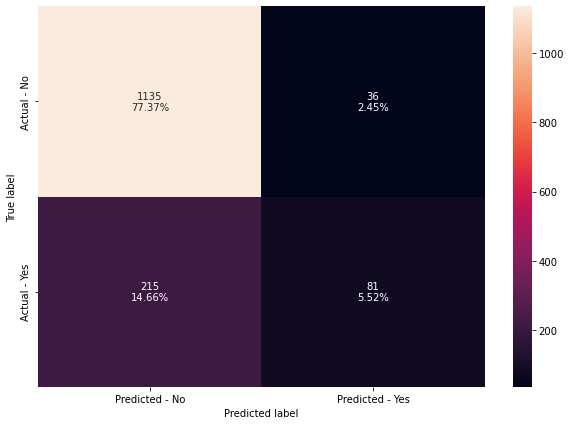

In [317]:
make_confusion_matrix(abc,y_test)

The confusion matrix
 - True Positives (TP): We correctly predicted that 81 customers accepted personal loan in the previous campaign<br>
 - True Negatives (TN): We correctly predicted that 1135 customers did not accept the personal loan in the previous campaign<br>
 - False Positives (FP): We incorrectly predicted that 36 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - False Negatives (FN): We incorrectly predicted that 215 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

### Gradient Boosting Classifier

In [318]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(x_train,y_train)

GradientBoostingClassifier(random_state=1)

In [319]:
gbc_estimator__score=get_metrics_score(gbc) # calculate the metrics using function defined

Accuracy on training set :  0.8909675533469745
Accuracy on test set :  0.8541240627130198
Recall on training set :  0.4855769230769231
Recall on test set :  0.3581081081081081
Precision on training set :  0.8535211267605634
Precision on test set :  0.8153846153846154
F1 on training set :  0.6189989785495403
F1 on test set :  0.49765258215962443


 - The Recall and precesion in this model are doing better than adaBoost classifier

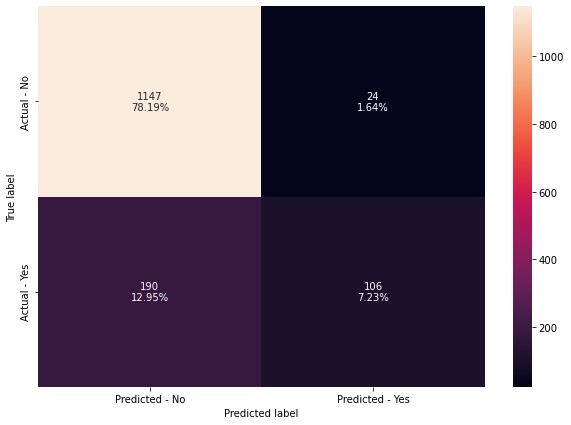

In [320]:
make_confusion_matrix(gbc,y_test)

The confusion matrix
 - True Positives (TP): We correctly predicted that 106 customers accepted personal loan in the previous campaign<br>
 - True Negatives (TN): We correctly predicted that 1147 customers did not accept the personal loan in the previous campaign<br>
 - False Positives (FP): We incorrectly predicted that 24 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - False Negatives (FN): We incorrectly predicted that 190 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

### XGBoost Classifier

In [321]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [322]:
xgb_estimator__score=get_metrics_score(xgb) # calculate the metrics using function defined

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9304703476482618
Recall on training set :  0.9983974358974359
Recall on test set :  0.6925675675675675
Precision on training set :  1.0
Precision on test set :  0.9490740740740741
F1 on training set :  0.9991980753809142
F1 on test set :  0.80078125


 - The metrics in XGBoost are doing good in train data compared to the other two models. But there is a lot of difference in the recall of the train set and test set. The model is overfitting the data.

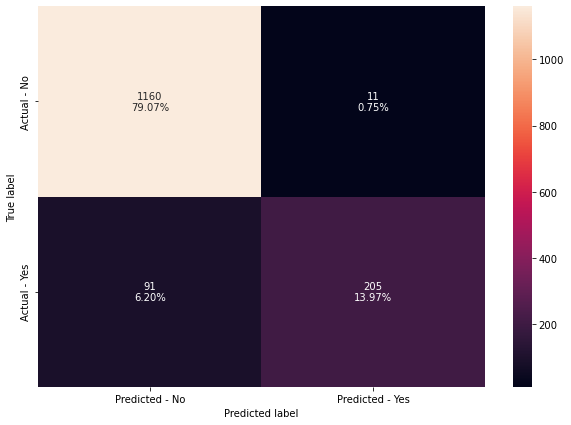

In [323]:
make_confusion_matrix(xgb,y_test)

The confusion matrix
 - True Positives (TP): We correctly predicted that 205 customers accepted personal loan in the previous campaign<br>
 - True Negatives (TN): We correctly predicted that 1160 customers did not accept the personal loan in the previous campaign<br>
 - False Positives (FP): We incorrectly predicted that 11 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - False Negatives (FN): We incorrectly predicted that 91 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

## Hyperparameter tuning (Boosting)

### AdaBoost Classifier

In [325]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),
                      DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=1.2000000000000002, n_estimators=100,
                   random_state=1)

In [326]:
abc_estimator_tuned__score=get_metrics_score(abc_tuned) # calculate the metrics using function defined

Accuracy on training set :  0.9923998830751243
Accuracy on test set :  0.8820722563053851
Recall on training set :  0.9615384615384616
Recall on test set :  0.5777027027027027
Precision on training set :  0.9966777408637874
Precision on test set :  0.7808219178082192
F1 on training set :  0.9787928221859706
F1 on test set :  0.6640776699029127


 - The model is overfitting the data as the accuracy is higher than test data.<br>
 - The recall of train set is much higher than the test set.

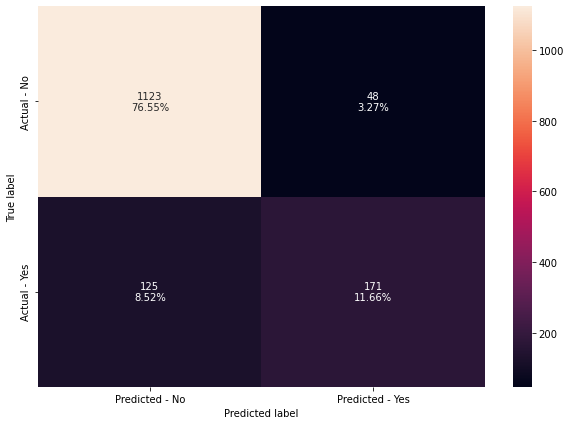

In [327]:
make_confusion_matrix(abc_tuned,y_test)

The confusion matrix
 - True Positives (TP): We correctly predicted that 171 customers accepted personal loan in the previous campaign<br>
 - True Negatives (TN): We correctly predicted that 1123 customers did not accept the personal loan in the previous campaign<br>
 - False Positives (FP): We incorrectly predicted that 48 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - False Negatives (FN): We incorrectly predicted that 125 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

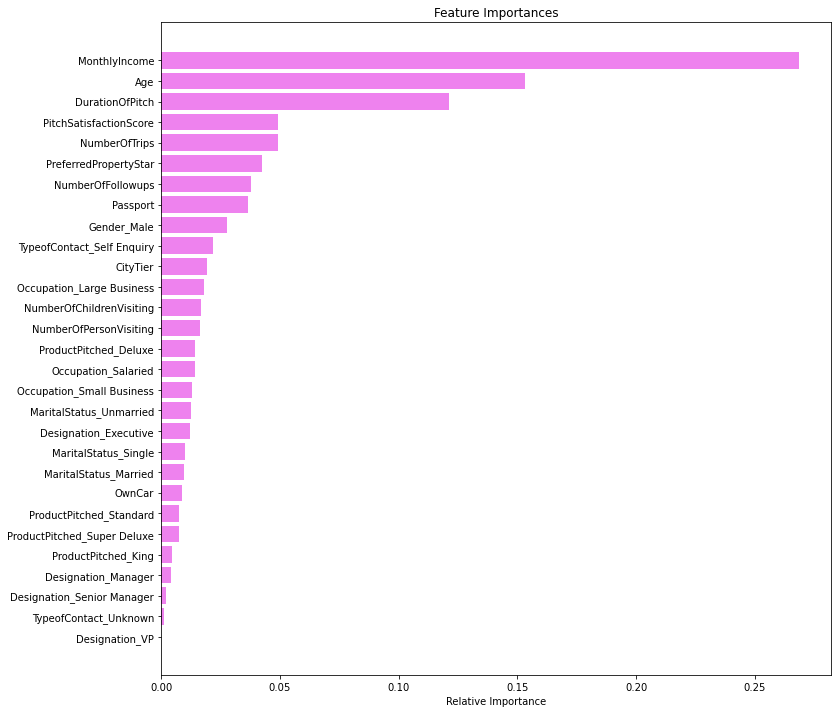

In [328]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

 - According to the AdaBoost tuned model Monthly Income has a higher influence on the model prediction.

### Gradient Boosting Classifier

In [329]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(x_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [330]:
gbc_estimator_init__score=get_metrics_score(gbc_init) # calculate the metrics using function defined

Accuracy on training set :  0.8886290558316282
Accuracy on test set :  0.8541240627130198
Recall on training set :  0.46634615384615385
Recall on test set :  0.3581081081081081
Precision on training set :  0.8584070796460177
Precision on test set :  0.8153846153846154
F1 on training set :  0.6043613707165109
F1 on test set :  0.49765258215962443


 - The accuracy has reduced compared to the AdaBoost tuned model.

In [331]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(x_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.8)

In [332]:
gbc_estimator_tuned__score=get_metrics_score(gbc_tuned) # calculate the metrics using function defined

Accuracy on training set :  0.9301373867290266
Accuracy on test set :  0.8834355828220859
Recall on training set :  0.6602564102564102
Recall on test set :  0.49324324324324326
Precision on training set :  0.9384965831435079
Precision on test set :  0.874251497005988
F1 on training set :  0.77516462841016
F1 on test set :  0.6306695464362851


 - The accuracy has increased compared to model with default parameters.<br>
 - The model is still overfitting the data.

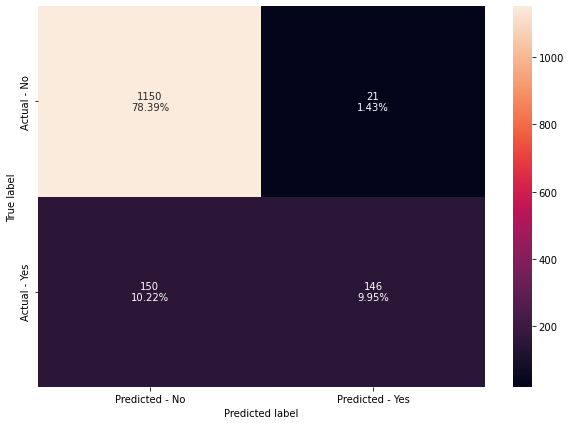

In [333]:
make_confusion_matrix(gbc_tuned,y_test)

The confusion matrix
 - True Positives (TP): We correctly predicted that 146 customers accepted personal loan in the previous campaign<br>
 - True Negatives (TN): We correctly predicted that 1150 customers did not accept the personal loan in the previous campaign<br>
 - False Positives (FP): We incorrectly predicted that 21 customers did not accept the personal loan in the previous campaign (a "Type I error")<br>
 - False Negatives (FN): We incorrectly predicted that 150 customers accepted the personal loan in the previous campaign (a "Type II error")<br>

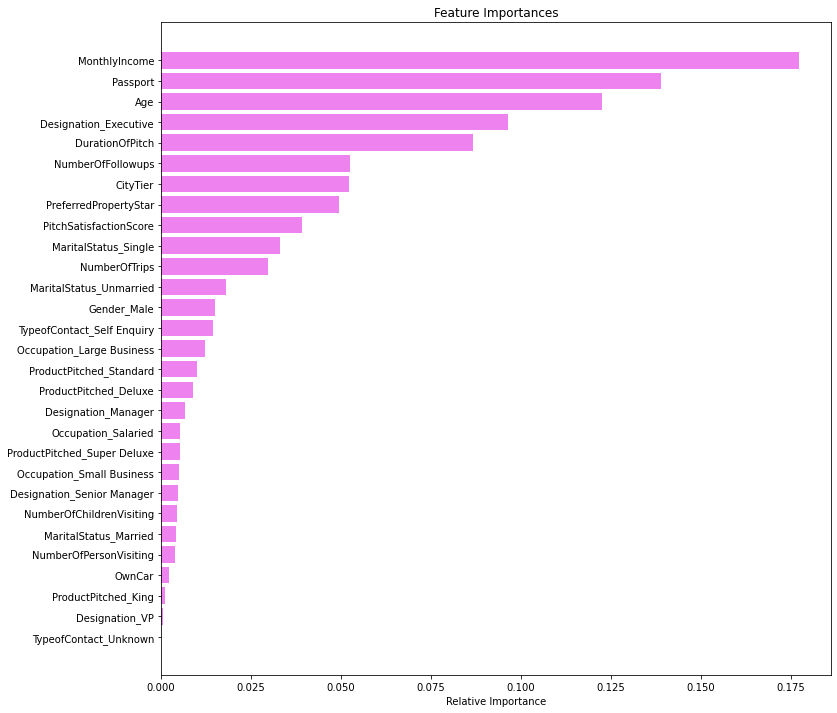

In [334]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

 - According to the Gradient Boost tuned model Monthly Income has a higher influence on the model prediction.

## Stacking Model

In [335]:
estimators=[('Decision Tree', dtree_estimator_tuned),('Random Forest', rf_estimator_weighted),
           ('Gradient Boosting', gbc_tuned)]
final_estimator=XGBClassifier(random_state=1)

In [336]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(x_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(max_depth=2,
                                                       max_leaf_nodes=3,
                                                       min_impurity_decrease=0.001,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.3,
                                                                     1: 0.7},
                                                       max_features=0.6000000000000001,
                                                       max_samples=0.6000000000000001,
                                                       min_samples_leaf=6,
                                                       n_estimators=150,
                                                       random_state=1)),
                               ('Gradient Boosting'...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1,
                                                 reg_alpha=None,
                                                 reg_lambda=None, ...))

In [337]:
stacking_estimator_score=get_metrics_score(stacking_estimator) # calculate the metrics using function defined

Accuracy on training set :  0.9222449576147326
Accuracy on test set :  0.8773006134969326
Recall on training set :  0.7355769230769231
Recall on test set :  0.6013513513513513
Precision on training set :  0.8196428571428571
Precision on test set :  0.7416666666666667
F1 on training set :  0.7753378378378378
F1 on test set :  0.664179104477612


 - The Recall of the model has significantly increased in this model, though the model is overfitting the data.

### Comparing Models (Boosting)

In [338]:
# defining list of models
models = [abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb, stacking_estimator]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    f1_train.append(np.round(j[6],2))
    f1_test.append(np.round(j[7],2))

In [339]:
comparison_frame_boosting = pd.DataFrame({'Model':['AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters','Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1_score':f1_train,'Test_F1_score':f1_test}) 
comparison_frame_boosting

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1_score,Test_F1_score
0,AdaBoost with default paramters,0.85,0.83,0.33,0.27,0.68,0.69,0.44,0.39
1,AdaBoost Tuned,0.99,0.88,0.96,0.58,1.00,0.78,0.98,0.66
2,Gradient Boosting with default parameters,0.89,0.85,0.49,0.36,0.85,0.82,0.62,0.50
3,Gradient Boosting with init=AdaBoost,0.89,0.85,0.47,0.36,0.86,0.82,0.60,0.50
4,Gradient Boosting Tuned,0.93,0.88,0.66,0.49,0.94,0.87,0.78,0.63
5,XGBoost with default parameters,1.00,0.93,1.00,0.69,1.00,0.95,1.00,0.80
6,Stacking Classifier,0.92,0.88,0.74,0.60,0.82,0.74,0.78,0.66


### Observations:

#### Model can predict the outcome in the wrong way:

 - The model predicts that the customer will buy the package, but does not buy the package.<br>
 - The model predicts that the customer will buy a package but does not buy a package.<br>
 
Losing a potential customer will cause mode loss, hence affecting the business. Hence we use __Recall__ as the metric of evaluation. We have to increase the recall to reduce false negatives.<br>

 - The feature importances show that MonthlyIncome have higher influence on the prediction of a potential customer.<br>
 - From the above comparison, we can see that Stacking Classifier have a higher recall score for both train and test data. Hence we go with this model.

## Insights
 
 - Different features are given importance in different models.<br>
 - According to decision tree passport and designation especially executives have hight influence.<br>
 - Random forests say that passport and age influence the package selection.<br>
 - All the boosting models indicate monthlyIncome as major factor influencing the packages chosen.<br>
 - Since Monthly income has a positive correlation with age, we can consider monthly income to be a dominant factor.<br>
 
### Bagging:

 - In Bagging we will be considering Bagging Classifier with Logistic Regression model for predictions.<br>
 - The Recall of this model is same for both train and test dataset.<br>
 - Other models seem to be overfitting the data.<br>
 
### Boosting:
 - In Boosting we will consider stacking classifier model for prediction.<br>
 - The recall of this model is doing better when compared to all the other models.<br>
 - In stacking we have used tuned Decision tree Classifier, tuned Gradient boost Classifier(Initialised with AdaBoost Classifier) and tuned Random Forest Classifiers as estimators. The final estimator is XGBoost Classifier.<br>
     

## Recommendations

 - As we can see almost all models are influenced by monthly income in one or the other way.<br>
 - So in the new Wellness Tourism package, it is important to make it affordable to all the customers with different income type.<br>
 - Passports also have some influence here, hence the package should be available both within the country and abroad, so that customers will have a flexibility to choose.<br>
 - The Executives also have an influence, which might indicate a particular age group which frequently travels. This also can be potentially used.<br>
 